# 支持向量机

数据集是一个蛋糕配方，共有muffin和cupcake两种类型的蛋糕，配方变量为Sugar和Butter。我们需要判断，给定Sugar和Butter值，预测该蛋糕类型。

### 导入数据

In [31]:
#导入数据
import pandas as pd
path = "cupcake or muffin.xlsx"
data = pd.read_excel(path)
print(data.shape)#(18, 3)
print(data.head(5))

(18, 3)
   Sugar  Butter CakeType
0      3       7   muffin
1     12       6   muffin
2     18       6   muffin
3     12       6   muffin
4      3       7   muffin


### 数据可视化

"\nlmplot()参数说明：\npalette='Set1'设置调色板型号，对应不同绘图风格，色彩搭配。\nfit_reg=False表示不显示拟合的回归线。因为lmplot()本身是线性回归绘图函数，默认会绘制点的拟合回归线。\nhue='CakeType'表示对样本点按照'CakeType'的取值不同进行分类显示，这样不同类型的蛋糕会用不同颜色显示。若不设置hue参数，则所有点都会显示为一个颜色显示。\nscatter_kws={'s':150}：设置点的大小，其中s表示size。\n"

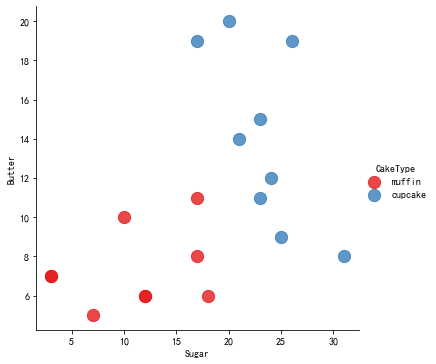

In [32]:
import seaborn as sns
sns.lmplot(data=data,x='Sugar',y='Butter',palette='Set1',fit_reg=False,hue='CakeType',scatter_kws={'s':150})
'''
lmplot()参数说明：
palette='Set1'设置调色板型号，对应不同绘图风格，色彩搭配。
fit_reg=False表示不显示拟合的回归线。因为lmplot()本身是线性回归绘图函数，默认会绘制点的拟合回归线。
hue='CakeType'表示对样本点按照'CakeType'的取值不同进行分类显示，这样不同类型的蛋糕会用不同颜色显示。若不设置hue参数，则所有点都会显示为一个颜色显示。
scatter_kws={'s':150}：设置点的大小，其中s表示size。
'''

从绘图结果来看，样本数据很适合进行二分类训练，因为两种蛋糕刚好可以互相分离，使用一条直线就可以将两类样本清楚划分。而且，这样的直线不止一条，因此，我们需要找到最优的那条划分直线。

### 数据预处理

In [33]:
#将CakeType的值映射到0、1，方便后续模型运算
import numpy as np
label = np.where(data['CakeType']=='muffin',0,1)
print(label)#[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
x = data[['Sugar','Butter']]
#print(x)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


### 训练svm分类器

In [34]:
from sklearn.svm import SVC
#SVC指Support Vector Classifier
svc = SVC(kernel='linear',C=1)
'''
SVC参数说明：
C:惩罚系数，即当分类器错误地将A类样本划分为B类了，我们将给予分类器多大的惩罚。当我们给与非常大的惩罚，即C的值设置的很大，那么分类器会变得非常精准，但是，会产生过拟合问题。
kernel：核函数，如果使用一条直线就可以将属于不同类别的样本点全部划分开，那么我们使用kernel='linear'，
如果不能线性划分开，尤其是当数据维度很多时，一般很难找到一条合适的线将不同的类别的样本划分开，那么就尝试使用高斯核函数（也称为径向基核函数-rbf）、多项式核函数（poly）
'''
svc.fit(X=x,y=label)

SVC(C=1, kernel='linear')

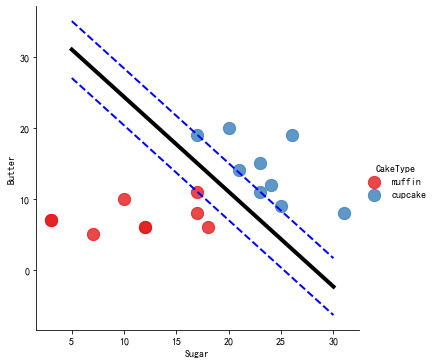

In [35]:
#根据拟合结果，找出超平面
w = svc.coef_[0]
a = -w[0]/w[1]#超平面的斜率，也是边界线的斜率
xx = np.linspace(5,30)#生成5~30之间的50个数
#print(xx)
yy = a * xx - (svc.intercept_[0])/w[1]

#根据超平面，找到超平面的两条边界线
b = svc.support_vectors_[0]
yy_down = a * xx + (b[1]-a*b[0])
b = svc.support_vectors_[-1]
yy_up = a * xx + (b[1]-a*b[0])

#绘制超平面和边界线
#(1)绘制样本点的散点图
sns.lmplot(data=data,x='Sugar',y='Butter',hue='CakeType',palette='Set1',fit_reg=False,scatter_kws={'s':150})
#（2）向散点图添加超平面
from matplotlib import pyplot as plt
plt.plot(xx,yy,linewidth=4,color='black')

#（3）向散点图添加边界线
plt.plot(xx,yy_down,linewidth=2,color='blue',linestyle='--')
plt.plot(xx,yy_up,linewidth=2,color='blue',linestyle='--')

### 导入数据

In [9]:
import numpy as np
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]
path = u'iris.data'  # 数据文件路径
'''fname:文件路径。eg：C:/Dataset/iris.txt。
　　dtype：数据类型。eg：float、str等。
　　delimiter：分隔符。eg：‘，’。
　　converters：将数据列与转换函数进行映射的字典。eg：{1:fun}，含义是将第2列对应转换函数进行转换。
　　usecols：选取数据的列。'''
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
print(data[:5])

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


### 划分数据集


In [11]:
from sklearn.model_selection import train_test_split
x, y = np.split(data, (4,), axis=1)
x = x[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)


### 训练svm分类器

In [15]:
import sklearn.svm as svm
'''
kernel='linear'时，为线性核，C越大分类效果越好，但有可能会过拟合（defaul C=1）。

　　 kernel='rbf'时（default），为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。

　　decision_function_shape='ovr'时，为one v rest，即一个类别与其他类别进行划分，

　　decision_function_shape='ovo'时，为one v one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。
'''
# clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())

SVC(C=0.8, gamma=20)

### 评估模型

In [19]:
print(clf.score(x_train, y_train))  # 精度
y_hat = clf.predict(x_train)
print(clf.score(x_test, y_test))
y_hat = clf.predict(x_test)

0.8666666666666667
0.65


### 绘制图像

<ipython-input-29-bbf4194ed0b3>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)


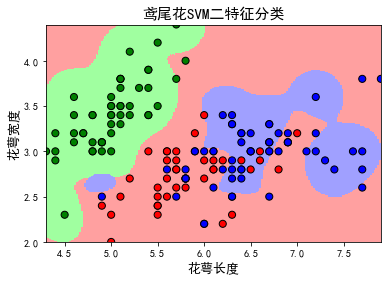

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
grid_hat = clf.predict(grid_test)       
grid_hat = grid_hat.reshape(x1.shape)  # 预测分类值 使之与输入的形状相同
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
# plt.grid()
plt.show()